In [1]:
import sys
sys.path.append("../../src")
import numpy as np
from utility import create_utility_func, SLOPenalty, SLOLinearPenalty
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 13})

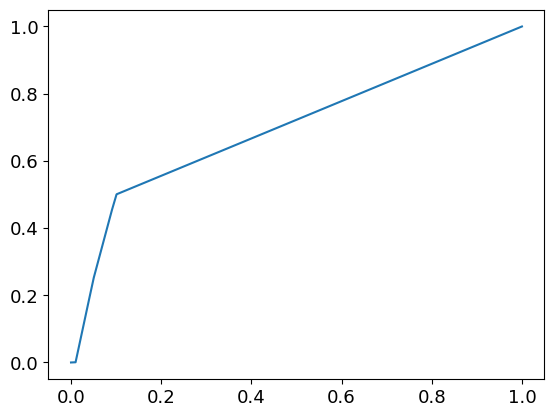

In [2]:
linear_penalty = SLOLinearPenalty()
x = np.linspace(0, 1, 100)
y = [linear_penalty(v) for v in x]
plt.plot(x, y)

/home/beomyeol/Workspace/ibm/faro/scripts/plots/../../src/utility.py:101: RuntimeWarning: overflow encountered in power
  np.clip(np.power(self.target_latency / latency, self.alpha),
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


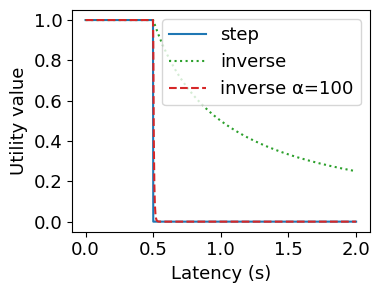

In [3]:
# slo_target = 500
slo_target = 0.5

factor = 0.6
plt.figure(figsize=(6.4 * factor, 4.8 * factor))

util_fn = create_utility_func("latency", slo_target)
step_util_fn = create_utility_func("latency_step", slo_target)
# sqaure_util_fn = create_utility_func("square_latency", slo_target)
# sqrt_util_fn = create_utility_func("sqrt_latency", slo_target)
power100_util_fn = create_utility_func("latency", slo_target, alpha=100)
# x = np.linspace(0, 2000, 1000)
x = np.linspace(0, 2, 1000)
plt.plot(x, [step_util_fn(v) for v in x], label="step", color="tab:blue")
plt.plot(x, [util_fn(v) for v in x], label="inverse", linestyle="dotted", color="tab:green")
# plt.plot(x, [sqaure_util_fn(v) for v in x], label="inverse α=2", linestyle="dashed")
# plt.plot(x, [sqrt_util_fn(v) for v in x], label="inverse α=1/2", linestyle="dashdot")
# plt.plot(x, [power100_util_fn(v) for v in x], label="inverse α=100", linestyle=(5, (10, 3)))
plt.plot(x, [power100_util_fn(v) for v in x], label="inverse α=100", linestyle="dashed", color="tab:red")
# plt.axvline(800, label="target SLO latency", color="r")
# plt.title("Latency SLO utility functions")
# plt.xlabel("Latency (ms)")
plt.xlabel("Latency (s)")
plt.ylabel("Utility value")# (SLO satisfaction rate)")
plt.legend()
xlim = plt.xlim()
locs, labels = plt.xticks()
labels = [str(v) for v in locs]
plt.xticks(locs, labels)
plt.xlim(xlim)
plt.savefig("images/latency_util_plot.eps", bbox_inches='tight')

Text(0, 0.5, 'Utility value')

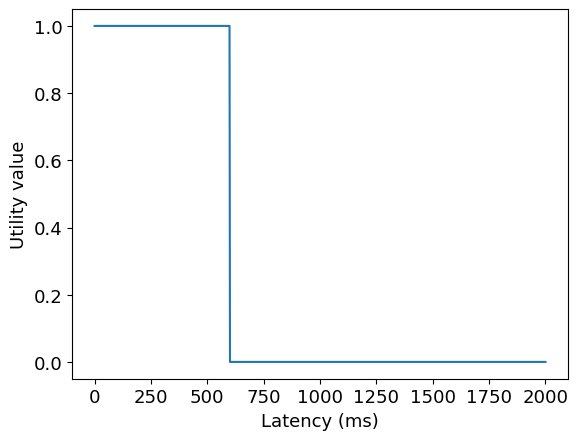

In [4]:
slo_target = 600

step_util_fn = create_utility_func("latency_step", slo_target)
x = np.linspace(0, 2000, 1000)
plt.plot(x, [step_util_fn(v) for v in x], label="step")
plt.xlabel("Latency (ms)")
plt.ylabel("Utility value")# (SLO satisfaction rate)")

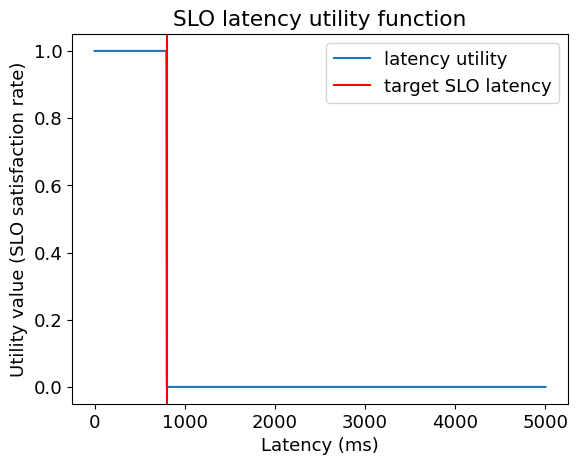

In [5]:
util_fn = create_utility_func("latency_step", 800)
x = np.linspace(0, 5000, 1000)
y = [util_fn(v) for v in x]
plt.plot(x, y, label="latency utility")
plt.axvline(800, label="target SLO latency", color="r")
plt.title("SLO latency utility function")
plt.xlabel("Latency (ms)")
plt.ylabel("Utility value (SLO satisfaction rate)")
plt.legend()

/home/beomyeol/Workspace/ibm/faro/scripts/plots/../../src/utility.py:101: RuntimeWarning: overflow encountered in power
  np.clip(np.power(self.target_latency / latency, self.alpha),


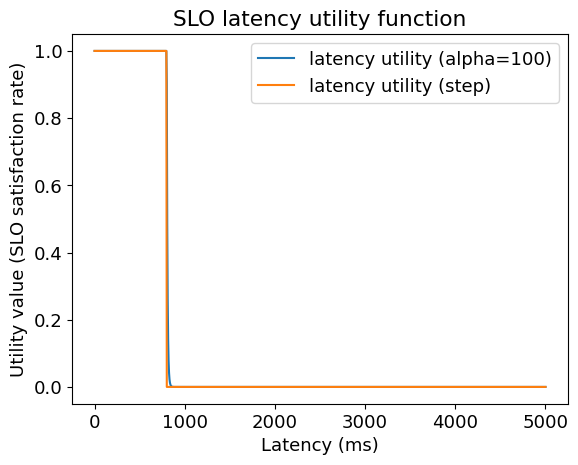

In [6]:
util_fn = create_utility_func("pow100_latency", 800)
step_util_fn = create_utility_func("latency_step", 800)
x = np.linspace(0, 5000, 1000)
y = [util_fn(v) for v in x]
y2 = [step_util_fn(v) for v in x]
plt.plot(x, y, label="latency utility (alpha=100)")
plt.plot(x, y2, label="latency utility (step)")
# plt.axvline(800, label="target SLO latency", color="r")
plt.title("SLO latency utility function")
plt.xlabel("Latency (ms)")
plt.ylabel("Utility value (SLO satisfaction rate)")
plt.legend()

Text(0, 0.5, 'Penality')

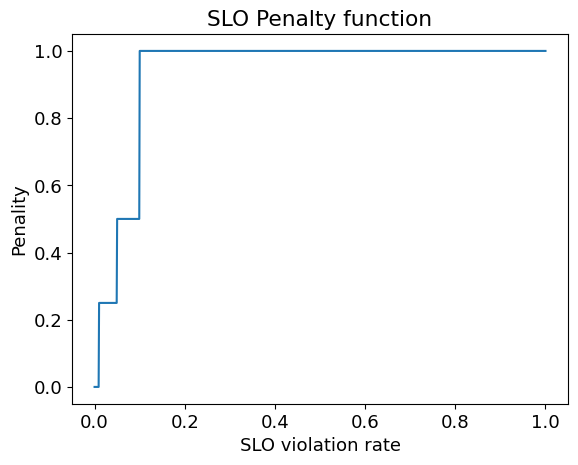

In [7]:
def step_fn(x):
    if x < 0.9:
        return 0
    elif x < 0.95:
        return 0.5
    elif x < 0.99:
        return 0.7
    else:
        return 1

x = np.linspace(0, 1, 1000)
# y = [1 - step_fn(v) for v in x]
penalty_fn = SLOPenalty([(0.01, 0), (0.05, 0.25), (0.1, 0.5)])
y = [penalty_fn(v) for v in x]
plt.title("SLO Penalty function")
plt.plot(x, y)
# plt.gca().invert_xaxis()
# plt.xlabel("SLO satisfaction rate")
plt.xlabel("SLO violation rate")
plt.ylabel("Penality")


/home/beomyeol/Workspace/ibm/faro/scripts/plots/../../src/utility.py:101: RuntimeWarning: overflow encountered in power
  np.clip(np.power(self.target_latency / latency, self.alpha),


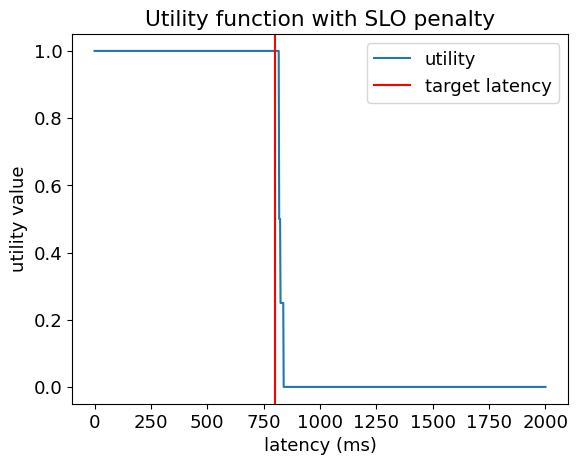

In [8]:
x = np.linspace(0, 2000, 1000)
# y = [step_fn(util_fn(v)) for v in x]
y = [penalty_fn(util_fn(v)) for v in x]
# y = [1 - penalty_fn(1 - util_fn(v)) for v in x]
# latency_with_penalty = create_utility_func(
#     "latency_with_penalty",
#     slo_target=800,
#     threshold_penalty_tuples=penalty_fn.threshold_penalty_tuples
# )
# y = [latency_with_penalty(v) for v in x]
plt.title("Utility function with SLO penalty")
plt.plot(x, y, label="utility")
plt.axvline(800, label="target latency", color="r")
plt.xlabel("latency (ms)")
plt.ylabel("utility value")
plt.legend()

In [9]:
from solver import _get_mdc_latency

processing_times = np.array([0.150])
input_rates = np.array([40.0]).reshape(-1, 1)
slo_targat = 4 * processing_times
# latency_p = 99
latency_p = 99.99

step_util_fn = create_utility_func("latency_step", slo_targat)
util_fn = create_utility_func("latency", slo_targat)
# max_rho = 0.95
max_rho = 1
# percentile = latency_p
percentile = latency_p

xs = np.linspace(1, 13, 100)
step_utilities = []
inverse_utilities = []
# relaxed_utilities = []
mdc_utilities = []
mdc_utilities_90 = []
mdc_utilities_99 = []
mdc_utilities_999 = []

for x in xs:
    x = np.array([x]).astype(float).reshape(-1, 1)
    rho = processing_times * input_rates / x
    # latency = rho

    if rho >= 1:
        latency = np.inf
    else:
        latency = _get_mdc_latency(x, input_rates=input_rates, processing_times=processing_times, percentile=percentile, max_rho=max_rho).item()
    step_utilities.append(step_util_fn(latency))
    inverse_utilities.append(util_fn(latency))

    # latency = _get_mdc_latency(x, input_rates=input_rates, processing_times=processing_times, percentile=percentile, max_rho=max_rho).item()
    # relaxed_utilities.append(util_fn(latency))

    latency = _get_mdc_latency(x, input_rates, processing_times, latency_p)
    utility = util_fn(latency)
    mdc_utilities.append(utility)
    # 0.9 max rho
    latency = _get_mdc_latency(x, input_rates, processing_times, latency_p, 0.9)
    utility = util_fn(latency)
    mdc_utilities_90.append(utility)

    # 0.99 max rho
    latency = _get_mdc_latency(x, input_rates, processing_times, latency_p, 0.99)
    utility = util_fn(latency)
    mdc_utilities_99.append(utility)

    # 0.999 max rho
    latency = _get_mdc_latency(x, input_rates, processing_times, latency_p, 0.999999)
    utility = util_fn(latency)
    mdc_utilities_999.append(utility)

    # print(rho, x, latency)

In [10]:
_get_mdc_latency(np.array([[8.0]]), input_rates=input_rates, processing_times=processing_times, percentile=percentile, max_rho=max_rho)

array([[0.45676005]])

Text(0, 0.5, 'Utility')

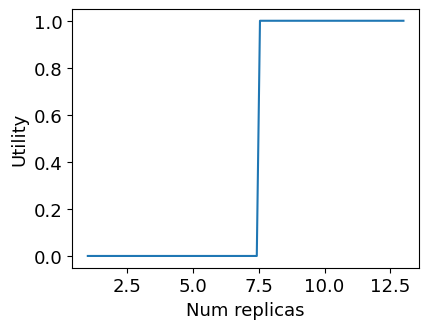

In [11]:
factor = 0.7
figsize = (6.4 * factor, 4.8 * factor)

plt.figure(figsize=figsize)
plt.plot(xs, step_utilities)
plt.xlabel("Num replicas")
plt.ylabel("Utility")
# plt.savefig("images/precise.eps", bbox_inches="tight")

Text(0, 0.5, 'Utility')

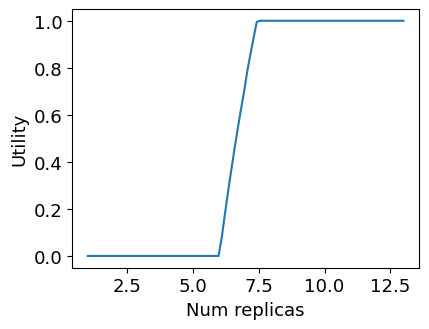

In [12]:
plt.figure(figsize=figsize)
plt.plot(xs, inverse_utilities)
plt.xlabel("Num replicas")
plt.ylabel("Utility")
# plt.savefig("images/inverse.eps", bbox_inches="tight")

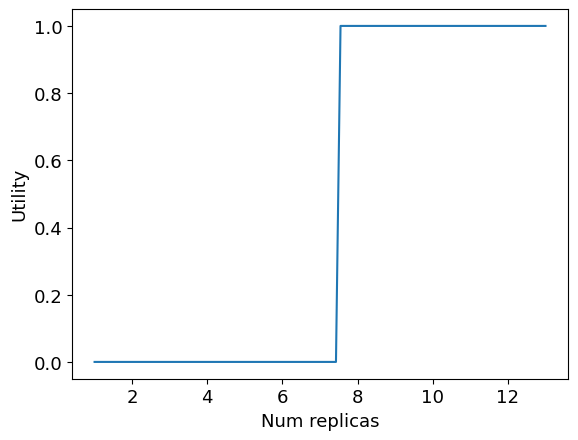

In [13]:
plt.plot(xs, step_utilities)
plt.xlabel("Num replicas")
plt.ylabel("Utility")
plt.savefig("images/precise.eps", bbox_inches="tight")

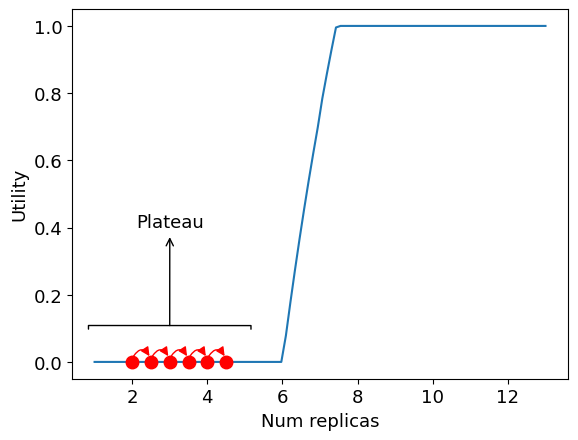

In [14]:
from matplotlib.patches import ArrowStyle

plt.plot(xs, inverse_utilities)
plt.xlabel("Num replicas")
plt.ylabel("Utility")
plt.annotate("Plateau", xy=(3, 0.1), xytext=(3-0.9, 0.4), arrowprops=dict(arrowstyle=ArrowStyle.CurveBracket(widthB=4.5), connectionstyle="arc3"))

plt.plot(np.arange(2, 5, 0.5), np.zeros(6), 'o', markersize=9, color="r")
for i in range(5):
    plt.annotate("", xy=(2.5+0.5*i, 0.01), xytext=(2+0.5*i, 0.01), arrowprops=dict(arrowstyle="-|>", connectionstyle="arc3,rad=-0.9", color="red"))

Text(0, 0.5, 'Utility')

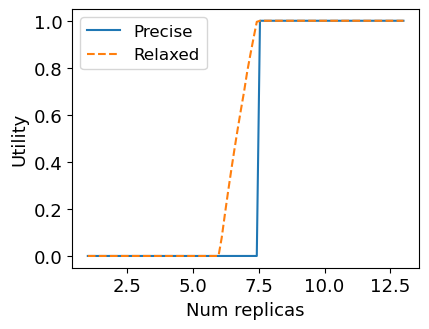

In [15]:
from matplotlib.patches import ArrowStyle

plt.figure(figsize=figsize)
plt.plot(xs, step_utilities, label="Precise")
plt.plot(xs, inverse_utilities, linestyle="dashed", label="Relaxed")
plt.legend(fontsize=12, loc="upper left")
plt.xlabel("Num replicas")
plt.ylabel("Utility")
# plt.savefig("images/precise_and_relaxed.eps", bbox_inches="tight")

# plt.annotate("Plateau", xy=(3, 0.1), xytext=(3-0.75, 0.4), arrowprops=dict(arrowstyle=ArrowStyle.CurveBracket(widthB=7), connectionstyle="arc3"))
# plt.plot(np.arange(1, 4, 0.5), np.zeros(6), 'o', markersize=9, color="r")
# for i in range(5):
#     plt.annotate("", xy=(1.5+0.5*i, 0.01), xytext=(1+0.5*i, 0.01), arrowprops=dict(arrowstyle="-|>", connectionstyle="arc3,rad=-0.9", color="red"))

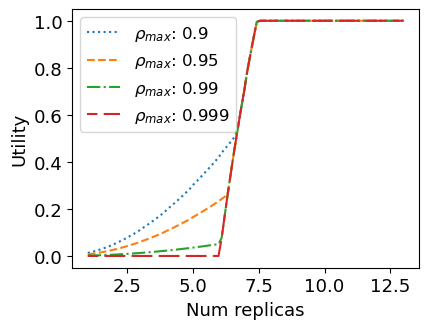

In [16]:
plt.figure(figsize=figsize)
plt.plot(xs, mdc_utilities_90, label=r"$\rho_{max}$: 0.9", linestyle="dotted")
plt.plot(xs, mdc_utilities, label=r"$\rho_{max}$: 0.95", linestyle="dashed")
plt.plot(xs, mdc_utilities_99, label=r"$\rho_{max}$: 0.99", linestyle="dashdot")
plt.plot(xs, mdc_utilities_999, label=r"$\rho_{max}$: 0.999", linestyle=(5, (10, 3)))
plt.xlabel("Num replicas")
plt.ylabel("Utility")
plt.legend(fontsize=12)
# plt.ylim((-0.05, 1.3))
# plt.savefig("images/relaxed_inverse_func_util.eps", bbox_inches="tight")

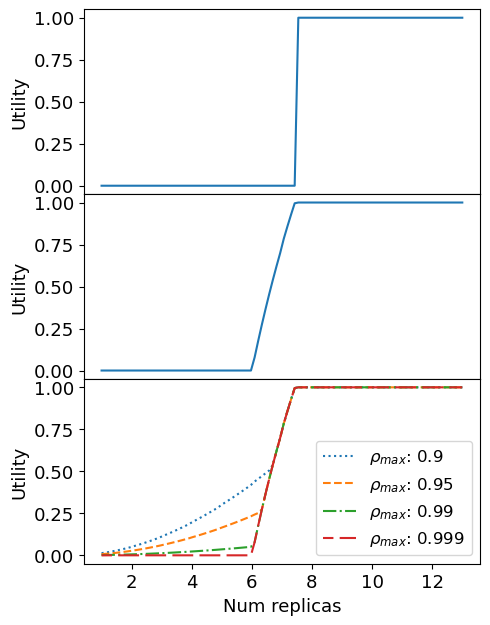

In [17]:
factor = 0.8
fig, axes = plt.subplots(3, 1, figsize=(6.4 * factor, 3 * 3 * factor))
for ax in axes:
    ax.set_ylim((-0.05, 1.05))
    ax.set_ylabel("Utility")
for ax in axes[:-1]:
    ax.set_xticklabels([])

plt.subplots_adjust(wspace=0, hspace=0)

axes[0].plot(xs, step_utilities)
axes[1].plot(xs, inverse_utilities)

axes[2].plot(xs, mdc_utilities_90, label=r"$\rho_{max}$: 0.9", linestyle="dotted")
axes[2].plot(xs, mdc_utilities, label=r"$\rho_{max}$: 0.95", linestyle="dashed")
axes[2].plot(xs, mdc_utilities_99, label=r"$\rho_{max}$: 0.99", linestyle="dashdot")
axes[2].plot(xs, mdc_utilities_999, label=r"$\rho_{max}$: 0.999", linestyle=(5, (10, 3)))
plt.xlabel("Num replicas")
plt.ylabel("Utility")
axes[2].legend(fontsize=12)
# plt.savefig("images/stacked_relaxation.eps", bbox_inches="tight")

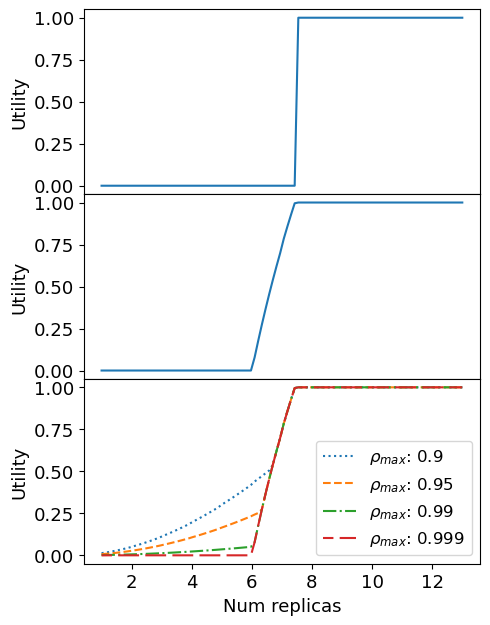

In [18]:
factor = 0.8
fig, axes = plt.subplots(3, 1, figsize=(6.4 * factor, 3 * 3 * factor))
for ax in axes:
    ax.set_ylim((-0.05, 1.05))
    ax.set_ylabel("Utility")
for ax in axes[:-1]:
    ax.set_xticklabels([])

plt.subplots_adjust(wspace=0, hspace=0)

axes[0].plot(xs, step_utilities)
axes[1].plot(xs, inverse_utilities)

axes[2].plot(xs, mdc_utilities_90, label=r"$\rho_{max}$: 0.9", linestyle="dotted")
axes[2].plot(xs, mdc_utilities, label=r"$\rho_{max}$: 0.95", linestyle="dashed")
axes[2].plot(xs, mdc_utilities_99, label=r"$\rho_{max}$: 0.99", linestyle="dashdot")
axes[2].plot(xs, mdc_utilities_999, label=r"$\rho_{max}$: 0.999", linestyle=(5, (10, 3)))
plt.xlabel("Num replicas")
plt.ylabel("Utility")
axes[2].legend(fontsize=12)
# plt.savefig("images/stacked_relaxation.eps", bbox_inches="tight")

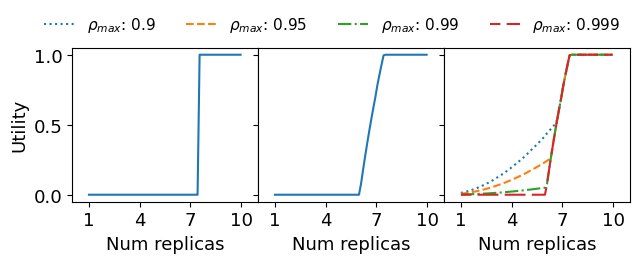

In [19]:
factor = 0.8
new_xs = [x for x in xs if x < 10]

fig, axes = plt.subplots(1, 3, figsize=(9 * factor, 2.5 * factor))
for ax in axes:
    ax.set_ylim((-0.05, 1.05))
    ax.set_xlabel("Num replicas")
    ax.set_xlim((0, 11))
    ax.set_xticks(np.arange(1, 11, 3))
for ax in axes[1:]:
    ax.set_yticklabels([])
axes[0].set_ylabel("Utility")

plt.subplots_adjust(wspace=0, hspace=0)

axes[0].plot(new_xs, step_utilities[:len(new_xs)])
axes[1].plot(new_xs, inverse_utilities[:len(new_xs)])

axes[2].plot(new_xs, mdc_utilities_90[:len(new_xs)], label=r"$\rho_{max}$: 0.9", linestyle="dotted")
axes[2].plot(new_xs, mdc_utilities[:len(new_xs)], label=r"$\rho_{max}$: 0.95", linestyle="dashed")
axes[2].plot(new_xs, mdc_utilities_99[:len(new_xs)], label=r"$\rho_{max}$: 0.99", linestyle="dashdot")
axes[2].plot(new_xs, mdc_utilities_999[:len(new_xs)], label=r"$\rho_{max}$: 0.999", linestyle=(5, (10, 3)))
plt.xlabel("Num replicas")
# plt.ylabel("Utility")
axes[2].legend(fontsize=11, bbox_to_anchor=(-0.6, 1.3), loc='upper center', ncol=4, frameon=False)
plt.savefig("images/stacked_relaxation.eps", bbox_inches="tight")

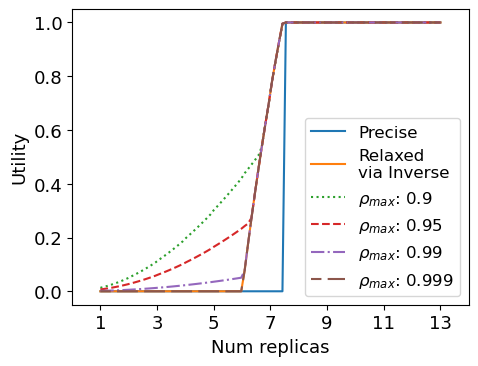

In [20]:
factor = 0.8
fig, ax = plt.subplots(figsize=(6.4 * factor, 4.8 * factor))

ax.set_ylim((-0.05, 1.05))
ax.set_xlim((0, 14))
ax.set_xticks(np.arange(1, 14, 2))
ax.set_xlabel("Num replicas")
ax.set_ylabel("Utility")

# plt.subplots_adjust(wspace=0, hspace=0)

ax.plot(xs, step_utilities, label="Precise")
ax.plot(xs, inverse_utilities, label="Relaxed\nvia Inverse")

ax.plot(xs, mdc_utilities_90, label=r"$\rho_{max}$: 0.9", linestyle="dotted")
ax.plot(xs, mdc_utilities, label=r"$\rho_{max}$: 0.95", linestyle="dashed")
ax.plot(xs, mdc_utilities_99, label=r"$\rho_{max}$: 0.99", linestyle="dashdot")
ax.plot(xs, mdc_utilities_999, label=r"$\rho_{max}$: 0.999", linestyle=(5, (10, 3)))

# plt.ylabel("Utility")
ax.legend(fontsize=12)
# plt.savefig("images/stacked_relaxation.eps", bbox_inches="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


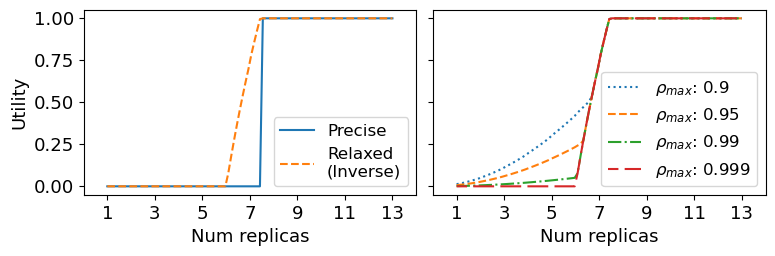

In [21]:
factor = 0.8
fig, axes = plt.subplots(1, 2, figsize=(11 * factor, 3 * factor))
for ax in axes:
    ax.set_ylim((-0.05, 1.05))
    ax.set_xlim((0, 14))
    ax.set_xticks(np.arange(1, 14, 2))
    ax.set_xlabel("Num replicas")
for ax in axes[1:]:
    ax.set_yticklabels([])
axes[0].set_ylabel("Utility")

plt.subplots_adjust(wspace=0.05, hspace=0)

axes[0].plot(xs, step_utilities, label="Precise")
axes[0].plot(xs, inverse_utilities, label="Relaxed\n(Inverse)", linestyle="dashed")

axes[1].plot(xs, mdc_utilities_90, label=r"$\rho_{max}$: 0.9", linestyle="dotted")
axes[1].plot(xs, mdc_utilities, label=r"$\rho_{max}$: 0.95", linestyle="dashed")
axes[1].plot(xs, mdc_utilities_99, label=r"$\rho_{max}$: 0.99", linestyle="dashdot")
axes[1].plot(xs, mdc_utilities_999, label=r"$\rho_{max}$: 0.999", linestyle=(5, (10, 3)))
# plt.ylabel("Utility")
axes[0].legend(fontsize=12, loc="lower right")
axes[1].legend(fontsize=12, loc="lower right")
plt.savefig("images/stacked_relaxation_row.eps", bbox_inches="tight")